=======================================================================================

# TP 2 d'Algèbre Linéaire - manipulations matricielles plus approfondies


=======================================================================================

In [3]:
import numpy as np

### EXERCICE 


<span style='color:blue'>Effectuer les produits terme à terme entre les deux matrices :</span>


<img src="figures/matrices.png"  width="200"/>

    
<span style='color:blue'>Produire un tableau de taille 7 x 8 ne contenant que des 3.</span>

In [4]:
a=np.array([[2,3,4],[1,5,6]])
b=np.array([[1,2,3]])
a, b
b.shape

(1, 3)

In [5]:
a*b

array([[ 2,  6, 12],
       [ 1, 10, 18]])

In [6]:
np.ones((7,8))*3

array([[3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3.]])

## Calcul de déterminant de matrice carrée

In [7]:
# Calculez le déterminant de a
a = np.array([[1, 2],
                 [3, 4]])


from numpy.linalg import det
det(a)
    

-2.0000000000000004

## Inversion de matrice carrée

In [8]:
# Inversez  a
a = np.array([[1, 3, 3],
                  [1, 4, 3],
                  [1, 3, 4]])

from numpy.linalg import inv
inv(a)

array([[ 7., -3., -3.],
       [-1.,  1.,  0.],
       [-1.,  0.,  1.]])

### Exercice 

<span style='color:blue'>Soit un vecteur x (à choisir de façon arbitraire)</span>
- <span style='color:blue'> Construire la matrice symétrique P dont le terme (i,j) vaut x[i]*x[j]</span>
- <span style='color:blue'> Est-elle inversible ?</span>

In [9]:
x = np.array([[1.0,5.0,4,7,9,2,3,5]])  # il faut définir un vecteur ligne (matrice 1 x n)
M = x.T.dot(x)
print('M ='+str(M))  # on constate que la matrice est bien symétrique
print('det(M) = '+str(det(M)))

M =[[ 1.  5.  4.  7.  9.  2.  3.  5.]
 [ 5. 25. 20. 35. 45. 10. 15. 25.]
 [ 4. 20. 16. 28. 36.  8. 12. 20.]
 [ 7. 35. 28. 49. 63. 14. 21. 35.]
 [ 9. 45. 36. 63. 81. 18. 27. 45.]
 [ 2. 10.  8. 14. 18.  4.  6. 10.]
 [ 3. 15. 12. 21. 27.  6.  9. 15.]
 [ 5. 25. 20. 35. 45. 10. 15. 25.]]
det(M) = 0.0


<span style='color:blue'> Le déterminant est nul, donc la matrice n'est pas inversible. </span>


- <span style='color:blue'> on peut le montrer facilement en dimension 2 en utilisant le déterminant </span>
- <span style='color:blue'> plus généralement, la colonne i de la matrice M est égale à xi * [x1,...xn] ; les vecteurs colonnes sont donc tous proportionnels ; le rang de la matrice est donc 1 et non pas n </span>

### Exercice 

<span style='color:blue'> Soit une matrice Q sans composantes nulles, de taille n x n, à simuler avec **np.random.random()** </span>
- <span style='color:blue'> Produire une fonction **factolu** reproduisant l'algorithme de décomposition LU et vérifier qu'il fonctionne bien sur plusieurs tirages de Q </span>

In [10]:
# Algorithme de la décomposition LU

def factolu(A):
    n=np.shape(A)[0]
    L = np.identity(n)
    U = np.zeros(shape=(n,n))
    for i in range(0, n-1):
        for j in range(i+1, n):
            L[j,i] = A[j,i]/A[i,i]
            for k in range(i + 1, n):
                A[j:k] -= L[j, i] * U[i, k]
        for j in range(i, n):
            U[i,j] = A[i,j]
    U[-1,-1] = A[-1,-1]    # Modification de l'élément U(n,n)
    B = L.dot(U)           # Recalcul de la matrice finale (doit être égale à A)
    return L, U, B

In [11]:
# Vérification sur quelques tirages

A = np.random.random(size=(4,4))
print('A = \n '+str(A),"\n\n")
L,U,B = factolu(A)
print("L = \n ",L, "\n\n U = \n", U, "\n\n")

print('Le résultat de la décomposition est  B = \n '+str(B),"\n")

A = 
 [[0.6986125  0.8340754  0.63306427 0.32099265]
 [0.12687247 0.02129727 0.37103475 0.31723946]
 [0.07775472 0.38781492 0.37564307 0.85711226]
 [0.64415512 0.71997231 0.86012633 0.28054131]] 


L = 
  [[ 1.          0.          0.          0.        ]
 [ 0.18160635  1.          0.          0.        ]
 [ 0.11129878 18.20960755  1.          0.        ]
 [ 0.92204923 33.80585035  2.2897436   1.        ]] 

 U = 
 [[0.6986125  0.8340754  0.63306427 0.32099265]
 [0.         0.02129727 0.37103475 0.31723946]
 [0.         0.         0.37564307 0.85711226]
 [0.         0.         0.         0.28054131]] 


Le résultat de la décomposition est  B = 
 [[ 0.6986125   0.8340754   0.63306427  0.32099265]
 [ 0.12687247  0.17277066  0.48600324  0.37553376]
 [ 0.07775472  0.4806465   7.20249959  6.66964442]
 [ 0.64415512  1.4890309  13.98698807 13.26362937]] 



### Remarque : 
<span style='color:blue'> La librairie **SciPy** contient la décomposition LU (PLU) </span>
Effectuez-là sur cette matrice

In [12]:
import scipy.linalg as sl
(P2,L2,U2) = sl.lu(A)
print("P = \n ",P2, "\n\n L = \n ",L2, "\n\n U = \n", U2, "\n\n")

P = 
  [[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]] 

 L = 
  [[ 1.          0.          0.          0.        ]
 [ 0.11129878  1.          0.          0.        ]
 [ 0.18160635 -0.44129989  1.          0.        ]
 [ 0.92204923 -0.16640352  0.83736076  1.        ]] 

 U = 
 [[ 0.6986125   0.8340754   0.63306427  0.32099265]
 [ 0.          0.29498335  0.30518379  0.82138616]
 [ 0.          0.          0.39074383  0.62142278]
 [ 0.          0.          0.         -0.39910322]] 




<span style='color:blue'> On remarque que la décomposition LU (PLU) n'est pas unique </span>

### Exercice 

- <span style='color:blue'> A partir des informations précédentes, produire une fonction qui simule des matrices carrées de dimension croissante et calcule le log de la valeur absolue de leur déterminant
</span>

- <span style='color:blue'> Tracer l'évolution du log de la valeur absolue du déterminant de ces matrices en fonction de la dimension </span>
- <span style='color:blue'> Que constatez-vous ? Que pouvez-vous en déduire sur les algorithmes d'inversion ?</span>

In [13]:
# Une première fonction

def logabsdet(d):
    A = np.random.random(size=(d,d))
    res = np.log(np.abs(det(A)))
    return res

In [14]:
# Une deuxième fonction qui produit la médiane des log des valeurs absolues des déterminants

def logabsdet_median(d,m=30):
    res = np.empty(m)
    for i in range(0,m):
        A = np.random.random(size=(d,d))
        res[i] = np.log(np.abs(det(A)))
    return np.nanmedian(res)  # On ignore les NaN éventuels

In [15]:
# Cette fonction calcule une boucle de résultats

def boucle_logabset(dmin=2,dmax=50,option=1):
    res = np.empty(dmax-dmin+1)
    i=1
    for d in range(dmin,dmax):
        if (option==1):
            res[i] = logabsdet(d) # Calcul simple
        else:
            res[i] = logabsdet_median(d) # Calcul médian
        i+=1
    return(res)

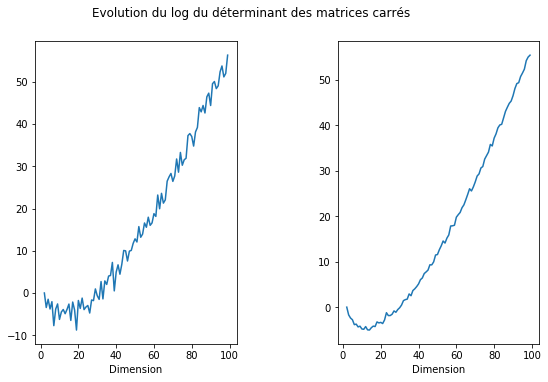

In [16]:
# Plot de l'évolution

dimension = np.arange(2,100)
y = boucle_logabset(min(dimension),max(dimension))
y2 = boucle_logabset(min(dimension),max(dimension),option=2) # version avec calcul médian
import matplotlib.pyplot as plt

# Première possibilité
#plt.figure()
#plt.plot(dimension,y)
#plt.show()

# Deuxkème possibilité
figure = plt.figure(figsize = (10, 6))
plt.gcf().subplots_adjust(left = 0.2, bottom = 0.2, right = 0.9, top = 0.9, wspace = 0.5, hspace = 0)
plt.subplot(1, 2, 1)
plt.plot(dimension,y)
plt.xlabel('Dimension')
plt.subplot(1, 2, 2)
plt.plot(dimension,y2)
plt.xlabel('Dimension')
plt.suptitle('Evolution du log du déterminant des matrices carrés')
plt.show()


<span style='color:blue'> On constate que rapidement, pour des dimensions grandes, le calcul numérique du déterminant risque de poser problème.
Ce type de résultat montre l'intérêt de travailler sur des approches par décomposition qui n'impliquent pas
l'inversion (et le calcul du déterminant), comme LU
</span>

<span style='color:blue'> Dans le calcul, on pourra remarquer qu'on a de temps en temps des déterminants négatifs
</span>

### Exercice : Résolution d’un système d’équations linéaires

<span style='color:blue'> On veut résoudre le système d'équations linéaires </span>

3*x0 + x1 = 9

x0 + 2*x1 = 8

<span style='color:blue'>Essayons d'utiliser la fonction **numpy.linalg.solve()** </span>

In [17]:
a = np.array([[3,1], [1,2]])
b = np.array([9,8])

X = np.array(['X0','X1'])


print('le système linéaire est a.X = b avec')
print('a = ' + str(a))
print('b = ' + str(b))
print('et on note X=[X0,X1]')
print('','')
print(str(a[0,0])+'X0 + '+str(a[0,1])+'X1 = '+str(b[0]))
print(str(a[1,0])+'X0 + '+str(a[1,1])+'X1 = '+str(b[1]))

le système linéaire est a.X = b avec
a = [[3 1]
 [1 2]]
b = [9 8]
et on note X=[X0,X1]
 
3X0 + 1X1 = 9
1X0 + 2X1 = 8


 Résolvons le système

In [18]:
x = np.linalg.solve(a, b)
print('la solution est ' + str(x))

la solution est [2. 3.]


On peut vérifier la solution par le calcul nous-mêmes :

In [19]:
test_solution = a.dot(x)
print('la solution proposée est ' + str(test_solution) + ' et b est égal à ' + str(b))

la solution proposée est [9. 8.] et b est égal à [9 8]


On peut également vérifier que la solution est correcte grâce à **np.allclose()**

In [20]:
np.allclose(np.dot(a, x), b)

True

Un peu de documentation spécifique sur l'inversion de système linéaire en Python :

https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html

## Calcul de valeurs propres et vecteurs propres

Utilisons pour cela la fonction **numpy.linalg.eig()**

In [21]:
from numpy.linalg import eig
A = np.array([[ 1, 1, -2 ], [-1, 2, 1], [0, 1, -1]])
print('A='+str(A))

A=[[ 1  1 -2]
 [-1  2  1]
 [ 0  1 -1]]


In [22]:
D, V = eig(A)
print('Valeurs propres =' + str(D))

Valeurs propres =[ 2.  1. -1.]


In [23]:
print('Vecteurs propres =' + str(V))

Vecteurs propres =[[ 3.01511345e-01 -8.01783726e-01  7.07106781e-01]
 [ 9.04534034e-01 -5.34522484e-01 -1.92296269e-16]
 [ 3.01511345e-01 -2.67261242e-01  7.07106781e-01]]


Les colonnes de V sont les vecteurs propres de A associés aux valeurs propres qui apparaissent dans D.

### Exercice

<span style='color:blue'> Vérifier que les colonnes de V sont bien des vecteurs propres de A </span>

Il faut pour cela vérifier que  A*V = D*V où * est le produit scalaire matriciel

In [24]:
U=np.diag(D) # Il faut construire la matrice diagonale des valeurs propres

In [25]:
K=V.dot(U) # On construit aussi 
K

array([[ 6.03022689e-01, -8.01783726e-01, -7.07106781e-01],
       [ 1.80906807e+00, -5.34522484e-01,  1.92296269e-16],
       [ 6.03022689e-01, -2.67261242e-01, -7.07106781e-01]])

In [26]:
A.dot(V)

array([[ 6.03022689e-01, -8.01783726e-01, -7.07106781e-01],
       [ 1.80906807e+00, -5.34522484e-01,  1.11022302e-16],
       [ 6.03022689e-01, -2.67261242e-01, -7.07106781e-01]])

## Tableaux multidimensionnels ou Tenseurs

In [27]:
# On peut créer facilement une liste de listes
a = [[1,2,3],[4,5,6],[7,8,9]]
a
# ... mais ce n'est pas très intéressant en termes de manipulation :
# l'accès aux colonnes, en particulier,  est difficile

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [28]:
a[0][0]

1

In [29]:
# on peut imaginer créer un array de arrays...
a = np.empty((3,4,5))  # on crée un tableau de dimensions 3 x 4 x 5
a

array([[[-1.72723371e-077, -1.72723371e-077,  1.58101007e-322,
          0.00000000e+000,  0.00000000e+000],
        [ 5.02034658e+175,  3.92812952e-033,  1.68881402e-051,
          7.25483684e+169,  2.05476560e+160],
        [ 5.01163114e+217,  5.49419094e-143,  9.80058441e+252,
          6.52022889e+252,  1.06396443e+224],
        [ 7.20807997e+199,  4.71240421e+257,  4.50622273e-144,
          7.79952704e-143,  4.18679386e-062]],

       [[ 1.82636291e+184,  1.83019461e-076,  4.23042828e+175,
          1.41529402e+161,  6.00736899e-067],
        [ 4.31300548e+097,  3.38170611e-057,  4.26658745e+126,
          9.30350598e+199,  3.67152475e-062],
        [ 6.93693549e-310,  2.22507386e-308,  6.93693549e-310,
          9.58487353e-322,  0.00000000e+000],
        [ 0.00000000e+000,  1.32656377e-075,  5.02034658e+175,
          1.32656418e-075,  2.57741969e-056]],

       [[ 8.30397406e-067,  5.40362382e-038,  1.47763641e+248,
          1.16096346e-028,  7.69165785e+218],
        [ 1.356

In [80]:
a[:][:][:] = 1 # On remplit le tableau de 1
a

array([[[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]])

In [81]:
# Pour sélectionner l'élément a[1,4,3] on tape
a[0][3][2] = 200
a

array([[[  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.],
        [  1.,   1., 200.,   1.,   1.]],

       [[  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.]],

       [[  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.],
        [  1.,   1.,   1.,   1.,   1.]]])

In [82]:
# On peut aussi utiliser une autre approche pour déclarer un tableau multidimensionnel
cols = 3
rows = 4
a = [[0]*cols for _ in [0]*rows]
a

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [83]:
# On peut accéder aux éléments ainsi :
a[0][1] = 5
a

[[0, 5, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [84]:
# Encore une façon alternative de construire un tableau multidimensionnel
arr = np.empty((3,), dtype=np.object)
arr[0] = 'abc'
arr

array(['abc', None, None], dtype=object)

In [85]:
# Et encore une autre façon de faire...
arr2 = [[0]*cols]*rows
arr2[0]='abc'
arr2

['abc', [0, 0, 0], [0, 0, 0], [0, 0, 0]]

In [86]:
# On peut s'en servir pour initier des gros tableaux avec une valeur unique, ou un ensemble de valeurs 
arr2 = [np.arange(1, rows)*cols]*rows
arr2

[array([3, 6, 9]), array([3, 6, 9]), array([3, 6, 9]), array([3, 6, 9])]

In [87]:
arr2[0][0:2]

array([3, 6])

D'autres solutions pour traiter les tableaux multidimensionnels sont discutées sur https://stackoverflow.com/questions/508657/multidimensional-array-in-python

### Exercice : modéliser un système de coordonnées 3D évoluant le temps

<span style='color:blue'>  Supposons que vous ayez une collection de points 3D. Chaque point a une valeur de x, y, z et de temps. </span>

<span style='color:blue'>  S'agit-il d'un tableau de n x 4 ? Ou un tableau 4 * n ? </span>

<span style='color:blue'>  Pas vraiment.</span>

<span style='color:blue'>  Puisque chaque point a 4 valeurs fixes, il s'agit plutôt d'une liste de tuples. </span>

a = [ ( x, y, z, t ), ( x, y, z, t ), ... ]

<span style='color:blue'> Mieux encore, nous pourrions représenter cela comme une **liste d'objets** et pour cela il nous faut définir une **classe spécifique** </span> 

In [88]:
class Point( object ):
    def __init__( self, x, y, z, t ):
        self.x, self.y, self.z, self.t = x, y, z, t

 Remarque : 
 L'opération d'instanciation (en "appelant" un objet classe) crée un objet vide. 
 De nombreuses classes aiment créer des instances personnalisées correspondant à un état initial spécifique. 
 À cet effet, une classe peut définir une méthode spéciale nommée __init__()

<span style='color:blue'>  On peut alors définir la matrice 4D ainsi : </span>
    
a = [ Point(x,y,x,t), Point(x,y,z,t), ... ]

In [91]:
a = [ Point(1,1,1,1), Point(1,2,1,2), Point(2,2,1,3), Point(3,3,3,4), Point(4,5,6,5) ]
a[1].x

1

On veut ici accéder à toutes les coordonnées *i* de la trajectoire. On peut le faire via une fonction générique basique

In [92]:
def access_coord(a,attr): # Cette fonction prend une liste de classes Point en argument 
                          # ainsi que le nom de l'attribut
    val = np.empty(len(a)) 
    for i in range(0,len(a)):
        call = str('a[i].'+str(attr));
        val[i] = eval(call);
    return(val); 

In [93]:
access_coord(a,'t')

array([1., 2., 3., 4., 5.])

In [94]:
# On peut ainsi reconstituer facilement une matrice 4D
attributs = ['x','y','z','t']
positions = np.empty((len(a),4))
for j in range(0,4):  # boucle sur les attributs
    positions[:,j]=access_coord(a,attributs[j]);
print(positions)

[[1. 1. 1. 1.]
 [1. 2. 1. 2.]
 [2. 2. 1. 3.]
 [3. 3. 3. 4.]
 [4. 5. 6. 5.]]


<IPython.core.display.Javascript object>


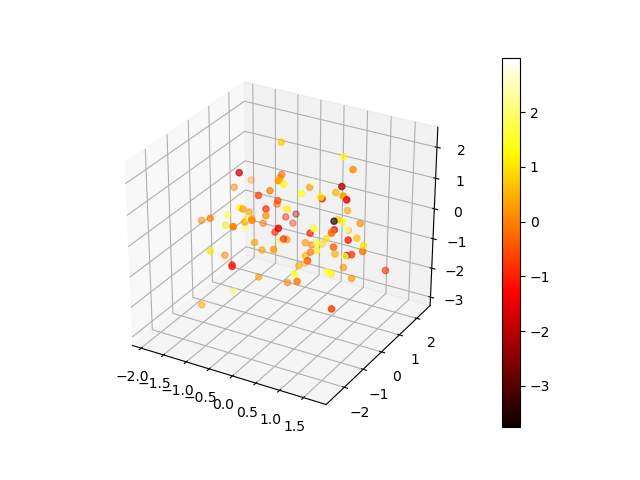

In [95]:
# Voici un exemple de plot 4D (un plot 3D avec une température)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.random.standard_normal(100)
y = np.random.standard_normal(100)
z = np.random.standard_normal(100)
c = np.random.standard_normal(100)

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
plt.show()

Essayons de plotter notre courbe 3D (ou matrice 4D) de la même façon...

<IPython.core.display.Javascript object>


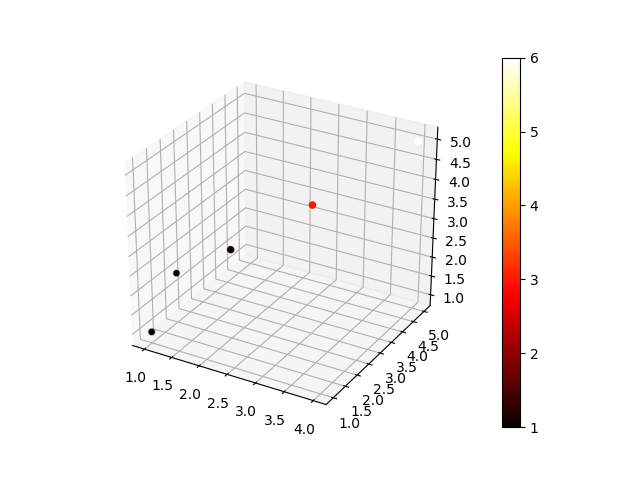

In [96]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x=positions[:,0]
y=positions[:,1]
z=positions[:,2]
t=positions[:,3]

img = ax.scatter(x, y, t, c=z, cmap=plt.hot())
fig.colorbar(img)
plt.show()

### Exemple : travail sur un jeu de données réelles

In [30]:
# On importe les données
%matplotlib notebook
from download import download
import pandas as pd
url = "http://www.lpsm.paris/pageperso/bousquet/yotta/data/council_tax.csv"
path_target = "./council_tax.csv"
import csv
data =  pd.read_csv(path_target,sep=";")

In [31]:
# On représente les données
data

Unnamed: 0   tax  surface  distance  period
0                1  1910       62        33     754
1                2  1973       44        36     830
2                3  1684       29         5     822
3                4  1466       40         3     657
4                5  1615       38        17     696
...            ...   ...      ...       ...     ...
946567      946568  1972       45        37     822
946568      946569  1727       49         4     802
946569      946570  1579       33         1     760
946570      946571  1515       47         1     680
946571      946572  1477       40         8     641

[946572 rows x 5 columns]

### Construction de la matrice A

In [32]:
A1 = np.ones(len(data))   # 1ere colonne de la matrice

X1 = data['surface']  # list
X2 = data['distance'] # list
X3 = data['period'] # list

In [33]:
# Il faut basculer ces listes en vecteur
# Cela peut facilement se faire avec la commande np.asarray()
X1 = np.asarray(X1)
X2 = np.asarray(X2)
X3 = np.asarray(X3)

In [34]:
# A présent, il faut transformer tous ces vecteurs en matrice de 1 seule colonne
A1.shape = (np.size(A1),1)
X1.shape=(np.size(X1),1)
X2.shape=(np.size(X2),1)
X3.shape=(np.size(X3),1)

In [36]:
# On peut à présent concaténer pour obtenir la matrice A du système linéaire
A = np.concatenate((A1,X1,X2,X3), axis=1) # Concaténation des colonnes
A

array([[  1.,  62.,  33., 754.],
       [  1.,  44.,  36., 830.],
       [  1.,  29.,   5., 822.],
       ...,
       [  1.,  33.,   1., 760.],
       [  1.,  47.,   1., 680.],
       [  1.,  40.,   8., 641.]])

In [182]:
# On vérifie les dimensions de la matrice
np.shape(A)

(946572, 4)

Il nous faut aussi calculer le pseudo-inverse de Moore-Penrose
Il est fourni par la commande **numpy.linalg.pinv()**

In [37]:
from numpy.linalg import pinv

In [38]:
B = pinv(A)

In [39]:
# Calcul du résultat
b = data['tax']
pseudo_solution = B.dot(b)
pseudo_solution

array([299.74814201,   4.00003116,   7.00002544,   1.50000042])

<IPython.core.display.Javascript object>


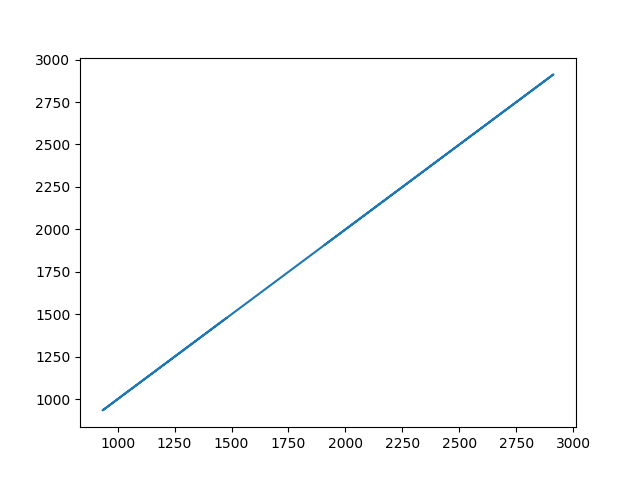

In [189]:
# Vérification de la solution
predict_tax = A.dot(pseudo_solution)

# Comparons les échantillons, par exemple en les plottant l'un contre l'autre
plt.figure()
plt.plot(b,predict_tax)
plt.show()

# On constate une excellente linéarité, donc adéquation de la solution